In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.models import load_model

In [ ]:
df=pd.read_csv('/content/soilmoisture_dataset.csv')
df.tail()

,index,datetime,soil_moisture,soil_temperature,454,458,462,466,470,474,...,914,918,922,926,930,934,938,942,946,950
674,677,2017-05-26 14:00:10,29.95,40.5,0.095628,0.063323,0.054875,0.052592,0.051657,0.050532,...,0.163177,0.163567,0.164741,0.164674,0.164187,0.164769,0.165175,0.165139,0.164672,0.164568
675,678,2017-05-26 14:02:10,29.85,39.5,0.095172,0.064181,0.054754,0.052329,0.051583,0.051085,...,0.163974,0.163969,0.164486,0.164360,0.164200,0.164243,0.164071,0.163975,0.164415,0.165097
676,679,2017-05-26 14:04:10,29.78,39.5,0.095643,0.064545,0.055754,0.052565,0.052036,0.051648,...,0.164781,0.165449,0.165924,0.165939,0.165627,0.164795,0.164872,0.164913,0.165139,0.165224
677,680,2017-05-26 14:06:10,29.90,39.5,0.095016,0.064233,0.055004,0.052435,0.051800,0.050964,...,0.164162,0.164828,0.165642,0.166186,0.166549,0.165808,0.165922,0.166376,0.166403,0.165649
678,681,2017-05-26 14:08:10,29.75,39.7,0.097682,0.065442,0.056054,0.053890,0.052824,0.051931,...,0.165825,0.166198,0.166590,0.167583,0.167872,0.167655,0.167314,0.166546,0.166405,0.165966


In [ ]:
df1=df['soil_moisture']
df1.head()

0    33.51
1    33.49
2    33.46
3    33.33
4    33.32
Name: soil_moisture, dtype: float64

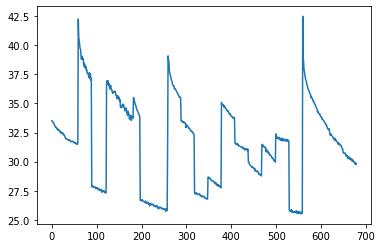

In [ ]:
plt.plot(df1)

In [ ]:
scalar=MinMaxScaler(feature_range=(0,1))
req=scalar.fit_transform(np.array(df1).reshape(-1,1))

for i in req:
  print(i)

[0.47117647]
[0.47]
[0.46823529]
[0.46058824]
[0.46]
[0.45470588]
[0.45058824]
[0.44411765]
[0.43882353]
[0.43882353]
[0.43823529]
[0.43176471]
[0.43235294]
[0.42470588]
[0.42823529]
[0.42705882]
[0.42588235]
[0.41823529]
[0.42117647]
[0.41176471]
[0.40941176]
[0.41294118]
[0.41294118]
[0.40588235]
[0.41058824]
[0.40470588]
[0.40470588]
[0.39823529]
[0.39823529]
[0.39]
[0.38764706]
[0.38058824]
[0.37941176]
[0.38]
[0.37882353]
[0.37764706]
[0.37411765]
[0.37588235]
[0.37294118]
[0.37588235]
[0.37058824]
[0.37]
[0.36647059]
[0.36529412]
[0.36529412]
[0.36823529]
[0.36647059]
[0.36647059]
[0.36411765]
[0.36588235]
[0.35882353]
[0.35823529]
[0.35941176]
[0.36058824]
[0.35764706]
[0.35294118]
[0.35588235]
[0.35294118]
[0.35764706]
[0.98529412]
[0.89529412]
[0.87588235]
[0.85941176]
[0.83705882]
[0.83411765]
[0.80235294]
[0.78235294]
[0.79764706]
[0.78705882]
[0.78117647]
[0.78647059]
[0.75117647]
[0.76294118]
[0.74235294]
[0.75411765]
[0.73588235]
[0.74529412]
[0.72588235]
[0.72882353]
[0.

In [ ]:
#splitting the dataset
print("total size",len(req))
training_data_size=int(len(req)*0.7)
print("train size",training_data_size)
testing_data_size=len(req)-training_data_size
print("test size",testing_data_size)


total size 679
train size 475
test size 204


In [ ]:
training_data=req[0:training_data_size]
print(len(training_data))
testing_data=req[training_data_size:len(req)]
print(len(testing_data))

475
204


In [ ]:
X_train=[]
Y_train=[]
timestep=100
t=0
for i in range(0,len(training_data)-timestep-1):
  data=training_data[i:i+timestep,0]
  X_train.append(data)
  Y_train.append(training_data[i+timestep,0])

X_train=np.array(X_train)
Y_train=np.array(Y_train)
print("X-train",X_train[0])
print("Y_train",Y_train[0])
# print(tr_data[1])
# print(te_data[1])
print(X_train.shape)
print("Y_train",Y_train.shape)

X-train [0.47117647 0.47       0.46823529 0.46058824 0.46       0.45470588
 0.45058824 0.44411765 0.43882353 0.43882353 0.43823529 0.43176471
 0.43235294 0.42470588 0.42823529 0.42705882 0.42588235 0.41823529
 0.42117647 0.41176471 0.40941176 0.41294118 0.41294118 0.40588235
 0.41058824 0.40470588 0.40470588 0.39823529 0.39823529 0.39
 0.38764706 0.38058824 0.37941176 0.38       0.37882353 0.37764706
 0.37411765 0.37588235 0.37294118 0.37588235 0.37058824 0.37
 0.36647059 0.36529412 0.36529412 0.36823529 0.36647059 0.36647059
 0.36411765 0.36588235 0.35882353 0.35823529 0.35941176 0.36058824
 0.35764706 0.35294118 0.35588235 0.35294118 0.35764706 0.98529412
 0.89529412 0.87588235 0.85941176 0.83705882 0.83411765 0.80235294
 0.78235294 0.79764706 0.78705882 0.78117647 0.78647059 0.75117647
 0.76294118 0.74235294 0.75411765 0.73588235 0.74529412 0.72588235
 0.72882353 0.71058824 0.71411765 0.71058824 0.69705882 0.68941176
 0.71352941 0.68588235 0.70764706 0.67705882 0.68588235 0.13764706

In [ ]:
#making desired testing data
X_test=[]
Y_test=[]
timestep=100
t=0
for i in range(0,len(testing_data)-timestep-1):
  data=testing_data[i:i+timestep,0]
  X_test.append(data)
  Y_test.append(testing_data[i+timestep,0])

X_test=np.array(X_test)
Y_test=np.array(Y_test)
print(X_test[1])
print(Y_test[1])
# print(tr_data[1])
# print(te_data[1])
print(X_test.shape)
print(Y_test.shape)

[0.33411765 0.31529412 0.32764706 0.32       0.31235294 0.31764706
 0.30882353 0.30588235 0.30882353 0.29823529 0.3        0.29764706
 0.29529412 0.29058824 0.28352941 0.28588235 0.28352941 0.28
 0.27235294 0.26941176 0.27058824 0.27117647 0.26235294 0.40470588
 0.39529412 0.39411765 0.38176471 0.38588235 0.38647059 0.37941176
 0.38058824 0.38705882 0.37588235 0.37705882 0.37294118 0.37823529
 0.38294118 0.36941176 0.38058824 0.37411765 0.37       0.37882353
 0.37411765 0.37588235 0.37       0.37352941 0.36882353 0.37705882
 0.37058824 0.36705882 0.37411765 0.37058824 0.36941176 0.01823529
 0.02058824 0.01176471 0.01529412 0.01352941 0.02117647 0.00823529
 0.01470588 0.01352941 0.00823529 0.00764706 0.00764706 0.00764706
 0.01294118 0.00882353 0.00647059 0.01647059 0.00352941 0.01
 0.00529412 0.00411765 0.01117647 0.00294118 0.00941176 0.00705882
 0.00764706 0.         0.00470588 0.00882353 0.00352941 1.
 0.79764706 0.76588235 0.72764706 0.71823529 0.69705882 0.68705882
 0.67647059 0.6

In [ ]:
#reshaping for feeding it to neural network
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1])

In [ ]:
model=Sequential()

model.add(Dense(8,input_shape=(100,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 8)                 808       
                                                                 
 dense_93 (Dense)            (None, 8)                 72        
                                                                 
 dense_94 (Dense)            (None, 16)                144       
                                                                 
 dense_95 (Dense)            (None, 16)                272       
                                                                 
 dense_96 (Dense)            (None, 64)                1088      
                                                                 
 dense_97 (Dense)            (None, 64)                4160      
                                                                 
 dense_98 (Dense)            (None, 128)              

In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=64)

Epoch 1/10
6/6 [==============================] - 1s 55ms/step - loss: 0.0811 - val_loss: 0.0089
Epoch 2/10
6/6 [==============================] - 0s 18ms/step - loss: 0.0404 - val_loss: 0.0086
Epoch 3/10
6/6 [==============================] - 0s 22ms/step - loss: 0.0345 - val_loss: 0.0071
Epoch 4/10
6/6 [==============================] - 0s 18ms/step - loss: 0.0240 - val_loss: 0.0074
Epoch 5/10
6/6 [==============================] - 0s 18ms/step - loss: 0.0228 - val_loss: 0.0110
Epoch 6/10
6/6 [==============================] - 0s 19ms/step - loss: 0.0190 - val_loss: 0.0100
Epoch 7/10
6/6 [==============================] - 0s 18ms/step - loss: 0.0178 - val_loss: 0.0092
Epoch 8/10
6/6 [==============================] - 0s 18ms/step - loss: 0.0150 - val_loss: 0.0091
Epoch 9/10
6/6 [==============================] - 0s 18ms/step - loss: 0.0142 - val_loss: 0.0109
Epoch 10/10
6/6 [==============================] - 0s 18ms/step - loss: 0.0125 - val_loss: 0.0081


In [ ]:
t1=model.predict(X_test)
t1_i=scalar.inverse_transform(t1)

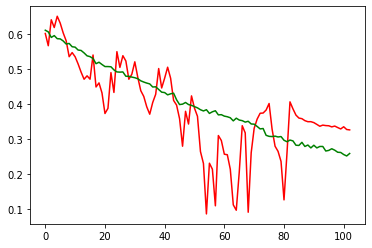

In [ ]:
plt.plot(range(0,len(t1)),t1,'r')
plt.plot(range(0,len(t1)),Y_test,'g')